<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [4]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Pneumonia/')
print(pneumonia_data)
print(len(pneumonia_data))

tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia/')
print(tidakPneumonia_data)
print(len(tidakPneumonia_data))

['person276_bacteria_1296.jpeg', 'person281_bacteria_1329.jpeg', 'person319_bacteria_1476.jpeg', 'person306_bacteria_1439.jpeg', 'person296_bacteria_1395.jpeg', 'person278_bacteria_1311.jpeg', 'person308_bacteria_1443.jpeg', 'person290_virus_594.jpeg', 'person281_bacteria_1325.jpeg', 'person307_bacteria_1441.jpeg', 'person302_bacteria_1430.jpeg', 'person294_bacteria_1381.jpeg', 'person299_bacteria_1417.jpeg', 'person301_bacteria_1427.jpeg', 'person277_bacteria_1305.jpeg', 'person297_bacteria_1400.jpeg', 'person309_virus_632.jpeg', 'person287_bacteria_1355.jpeg', 'person292_virus_602.jpeg', 'person281_bacteria_1333.jpeg', 'person306_virus_628.jpeg', 'person307_virus_629.jpeg', 'person317_virus_643.jpeg', 'person318_bacteria_1474.jpeg', 'person296_virus_613.jpeg', 'person277_virus_571.jpeg', 'person311_virus_634.jpeg', 'person281_bacteria_1332.jpeg', 'person287_bacteria_1354.jpeg', 'person273_virus_561.jpeg', 'person286_virus_585.jpeg', 'person277_bacteria_1304.jpeg', 'person305_bacteria

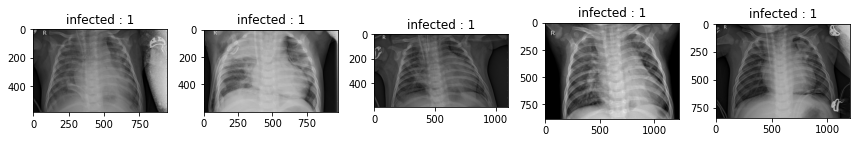

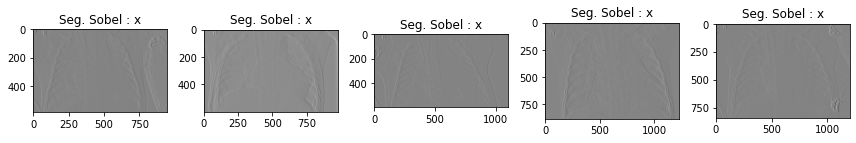

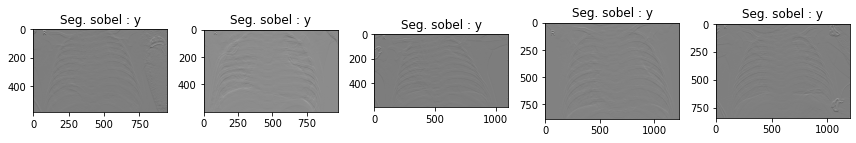

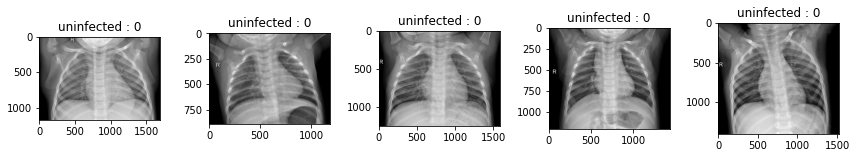

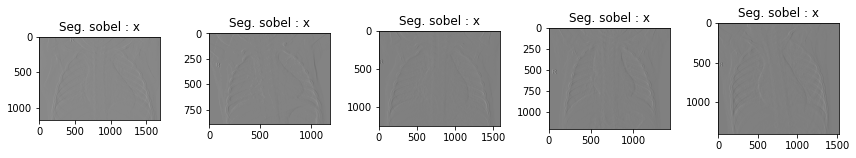

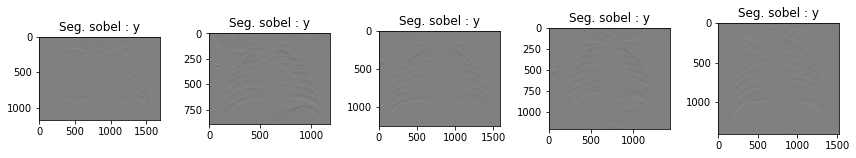

In [5]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi


plt.figure(figsize = (12,12)) #mengatur skala citra yg ditmpilkan
for i in range(5):            #melakukan perulangan sbnyk 5X (dgn nilai awal i=0)
    plt.subplot(1, 5, i+1)    #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img,cmap='gray')           #plot citra sesuai ketmpt yg disediakan baris ke2
    plt.title('infected : 1') #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()        #tampilannya disesuaikan dgn lebar layar

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()

plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(gray, (3,3), 0)
  edges = cv2.Sobel (img, cv2.CV_64F,0,1, ksize=5)
  plt.imshow(edges, cmap="gray")
  plt.title ('Seg. sobel : y')
  plt.tight_layout()


#Tahap Visualisasi Citra Tidak Pneumonia

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA2080/DatasetPneumonia2080.csv", x, fmt='%s',delimiter=',' )

In [10]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA2080/DatasetPneumonia2080.csv')
print (len(dataset))
print (dataset)

1000
               H1            H2  ...            H7  Target
0    1.484423e-02  1.229102e-04  ...  2.035604e-14     1.0
1    2.234193e-02  3.599689e-04  ...  1.279967e-11     1.0
2    9.360062e-01  1.011171e+00  ...  3.810634e-02     1.0
3    7.225361e+06  5.220601e+13  ... -2.154371e+32     1.0
4    5.288030e-03  1.259893e-02  ... -4.743121e-07     1.0
..            ...           ...  ...           ...     ...
995  3.640370e+02  1.331963e+05  ...  1.745431e+12     0.0
996  7.218455e+02  5.218237e+05  ... -6.701691e+12     0.0
997  3.284896e+04  1.079190e+09  ...  8.276672e+20     0.0
998  2.656704e+05  7.058335e+10  ...  6.398006e+25     0.0
999  3.395030e+04  1.152760e+09  ...  3.103710e+20     0.0

[1000 rows x 8 columns]


In [11]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

800
200
800
200
1000


,H1,H2,H3,H4,H5,H6,H7
0,1.484423e-02,1.229102e-04,6.836914e-07,2.819733e-07,1.221212e-13,3.012354e-09,2.035604e-14
1,2.234193e-02,3.599689e-04,5.144527e-05,4.026719e-05,1.832690e-09,7.329852e-07,1.279967e-11
2,9.360062e-01,1.011171e+00,4.193568e+00,3.790855e+00,1.511458e+01,3.811665e+00,3.810634e-02
3,7.225361e+06,5.220601e+13,1.508832e+21,1.508829e+21,2.276567e+42,1.090185e+28,-2.154371e+32
4,5.288030e-03,1.259893e-02,6.069456e-03,4.942948e-04,-7.127654e-07,-2.203672e-06,-4.743121e-07
...,...,...,...,...,...,...,...
995,3.640370e+02,1.331963e+05,1.944497e+08,1.936524e+08,3.757837e+16,7.067551e+10,1.745431e+12
996,7.218455e+02,5.218237e+05,1.507667e+09,1.506442e+09,2.270290e+18,1.088214e+12,-6.701691e+12
997,3.284896e+04,1.079190e+09,1.418094e+14,1.417986e+14,2.010762e+28,4.658231e+18,8.276672e+20
998,2.656704e+05,7.058335e+10,7.500882e+16,7.500710e+16,5.626130e+33,1.992753e+22,6.398006e+25


0.0    626
1.0    174
Name: Target, dtype: int64
0.0    174
1.0     26
Name: Target, dtype: int64


Text(0.5, 1.0, 'TESTING')

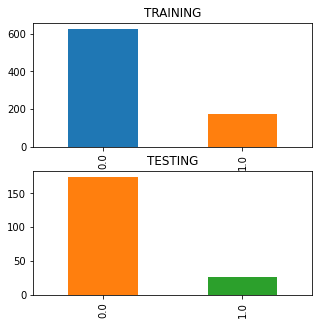

In [12]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,5)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [13]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.03889968, -0.03560899, -0.03539434, ..., -0.03537746,
         0.03537874, -0.03537753],
       [ 0.03889968, -0.03560899, -0.03539434, ..., -0.03537746,
         0.03537874, -0.03537753],
       [ 0.03889968, -0.03560899, -0.03539434, ..., -0.03537746,
         0.03537874, -0.03537753],
       ...,
       [-2.14462069,  0.13390965, -0.02227463, ..., -0.03537138,
         0.03436336, -0.0353213 ],
       [ 0.03889968, -0.03560899, -0.03539434, ..., -0.03537746,
         0.03537874, -0.03537753],
       [ 0.03889968, -0.03560899, -0.03539434, ..., -0.03537746,
         0.03537874, -0.03537753]])

In [14]:
math.sqrt(len(y_test))

14.142135623730951

In [15]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [16]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[171   3]
 [ 24   2]]
Akurasi : 0.865
presisi : 0.4
recall : [0.98275862 0.07692308]
F-Measure : [0.92682927 0.12903226]


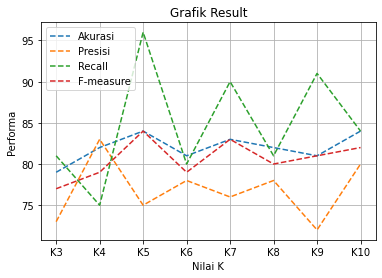

In [18]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()